<b>Assignment for week 1 by Shawgat Ashrafi(170610107063)<b>

In [10]:
#The required packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<b>Load and preprocess Data<b>

In [11]:
#The dataset is loaded
df = pd.read_csv('PCA_practice_dataset.csv')
df.head()
X = df.to_numpy() #The data is converted to numpy
X.shape

(8041, 35)

In [12]:
#We need to scale the data with mean = 0 and standard deviation = 1 before applying PCA
scalar = StandardScaler()
X = scalar.fit_transform(X)

<b>Applying PCA<b>

In [13]:
#Applying PCA
pca = PCA()
X = pca.fit_transform(X)

In [14]:
#Getting a sum of all the eigen values for the corresponding eigen vectors
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100

In [15]:
#Declaring a list of the desired thresholds
thresholds = [i for i in range(90,97+1,1)]

In [16]:
#Making a list of the components required to retain the variance as mentioned in our required threshold list
components = [np.argmax(cumulative_variance>threshold)for threshold in thresholds]

for component, threshold in zip(components, thresholds):
    print("Components required for {}% threshold are : {}".format(threshold,component))

Components required for 90% threshold are : 2
Components required for 91% threshold are : 2
Components required for 92% threshold are : 3
Components required for 93% threshold are : 3
Components required for 94% threshold are : 4
Components required for 95% threshold are : 4
Components required for 96% threshold are : 5
Components required for 97% threshold are : 6


<b>Scree plot<b>

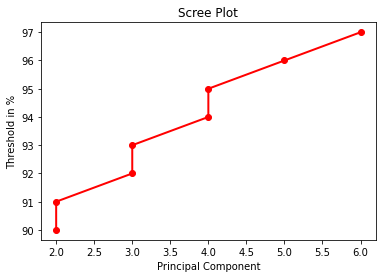

In [17]:
#Plotting these data in the form of a scree plot
plt.plot(components, range(90,97+1,1), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold in %')
plt.show()

<b>Dimensionality reduction<b>

In [18]:
#Performing dimensionality reduction
X_orig = X

for component,var in zip(components,thresholds):
    pca = PCA(n_components = component) #Passing the number of components required for each threshold
    X_transformed = pca.fit_transform(X_orig)  #We get the reduced dimensionality dataset
    print('Performing dimensionality reduction to retain {}% threshold'.format(var))
    print('After dimensionality reduction, the new shape to the dataset is :',X_transformed.shape)
    print('\n')

Performing dimensionality reduction to retain 90% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 91% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 2)


Performing dimensionality reduction to retain 92% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 93% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 3)


Performing dimensionality reduction to retain 94% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 95% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 4)


Performing dimensionality reduction to retain 96% threshold
After dimensionality reduction, the new shape to the dataset is : (8041, 5)


Performing dimensionality reductio

In [19]:
import pandas as pd

#loading the dataset
df = pd.read_csv('PCA_practice_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


In [20]:
from sklearn.preprocessing import StandardScaler

#standardizing the features of the dataset
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [21]:
import numpy as np

#constructing the covariance matrix. The covariance matrix stores the pairwise covariances between the different features
cov_mat = np.cov(df_std.T)

#computing the eigenvectors and eigenvalues of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [22]:
# Making a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
import matplotlib.pyplot as plt

CASE :  1
Thereshold for this case =  0.9
The Scree plot for this case is:


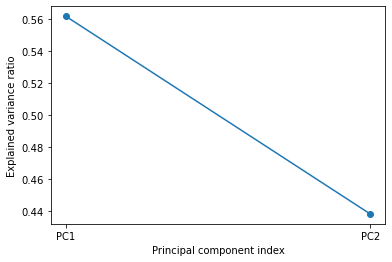

The number of principal components retained due to the thresholding =  2
CASE :  2
Thereshold for this case =  0.91
The Scree plot for this case is:


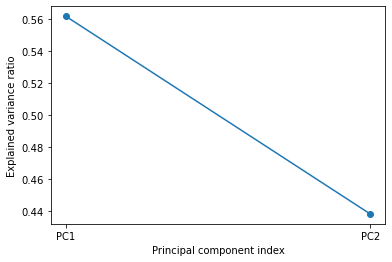

The number of principal components retained due to the thresholding =  2
CASE :  3
Thereshold for this case =  0.92
The Scree plot for this case is:


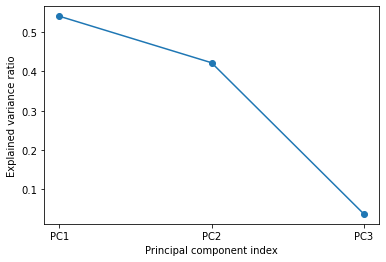

The number of principal components retained due to the thresholding =  3
CASE :  4
Thereshold for this case =  0.93
The Scree plot for this case is:


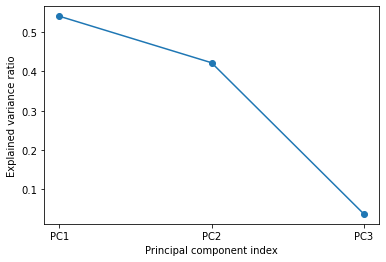

The number of principal components retained due to the thresholding =  3
CASE :  5
Thereshold for this case =  0.9400000000000001
The Scree plot for this case is:


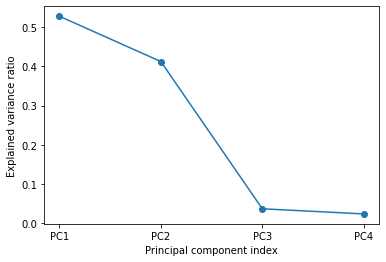

The number of principal components retained due to the thresholding =  4
CASE :  6
Thereshold for this case =  0.9500000000000001
The Scree plot for this case is:


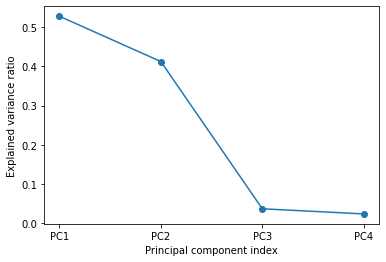

The number of principal components retained due to the thresholding =  4
CASE :  7
Thereshold for this case =  0.96
The Scree plot for this case is:


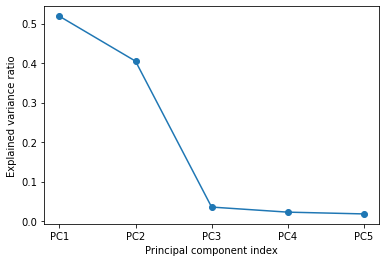

The number of principal components retained due to the thresholding =  5
CASE :  8
Thereshold for this case =  0.97
The Scree plot for this case is:


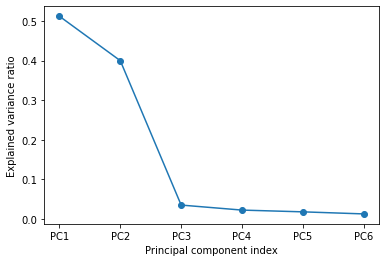

The number of principal components retained due to the thresholding =  6


In [24]:
for step in range(8):
  print('CASE : ',step+1)

  # Calculating the thereshold from the step number (initial thereshold is 0.9 and the step size is 0.01)
  thereshold = 0.9+(step*0.01)

  print('Thereshold for this case = ',thereshold)
  pc_vec = []

  sum_total_eigen_values = np.sum([i[0] for i in eigen_pairs])
  sum_sel_eigen_values = 0

  # From the sorted list of eigenpairs, we pick the eigenvectors in order such that the sum of the variance explained ratio of an eigenvalues of the selected eigenvectors is just less than (or equal to) the thereshold.
  # The variance explained ratio of an eigenvalue is simply the fraction of an eigenvalue and the total sum of the eigenvalues  
  for i in range(len(eigen_pairs)):
    sum_sel_eigen_values = sum_sel_eigen_values + eigen_pairs[i][0]
    if((sum_sel_eigen_values / sum_total_eigen_values)<= thereshold):
      pc_vec.append(eigen_pairs[i][1][:, np.newaxis])
    else:
      break

  # We stack the sequence of selected eigenvectors horizontally (i.e. column wise) to make the projection matrix
  w=tuple(i for i in pc_vec)
  w=np.hstack(w)

  # We use the projection matrix to transform the data onto the lower-dimensional subspace
  df_pca = df_std.dot(w)

  sum_pc=np.sum([eigen_pairs[i][0] for i in range(len(pc_vec))])
  pc=[(eigen_pairs[i][0]/sum_pc) for i in range(len(pc_vec))]

  # Now we plot the scree plot for this specific thereshold
  print('The Scree plot for this case is:')

  plt.plot(['PC'+str(i) for i in range(1,len(pc)+1)],pc,'o-')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.show()

  # Now we show the number of principal components retained due to the thresholding by simply counting the number of selected eigenvectors to make the projection matrix
  print('The number of principal components retained due to the thresholding = ',len(pc))